Variation of coefficients

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read the file
df = pd.read_csv("/Users/karnikabhardwaj/Downloads/bacteria_train.csv")

In [3]:
#take a quick look at the dataset 
df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [4]:
#Get the predictor ('Spreading_factor') and the response ('perc_population)
x, y = df[['Spreading_factor']], df['Perc_population']

In [8]:
#select the max degree of polynomial features 
maxdeg = 4
x_poly = PolynomialFeatures(maxdeg).fit_transform(x)

In [9]:
#select the list of alpha values ranging from 10 to 120 with 1000 points between them
alpha_list = np.linspace(10,120,1000)
len(alpha_list)

1000

In [10]:
#make an empty list coeff_List and for each value of alpha compute the coefficient and store them in it
coeff_list=[]

for i in alpha_list:
    ridge_reg = Ridge(alpha = i, normalize = True)
    ridge_reg.fit(x_poly, y)
    coeff_list.append(ridge_reg.coef_)

In [11]:
#get the transpose of the list to get the variation in the coefficient values as per degree
trend = np.array(coeff_list).T


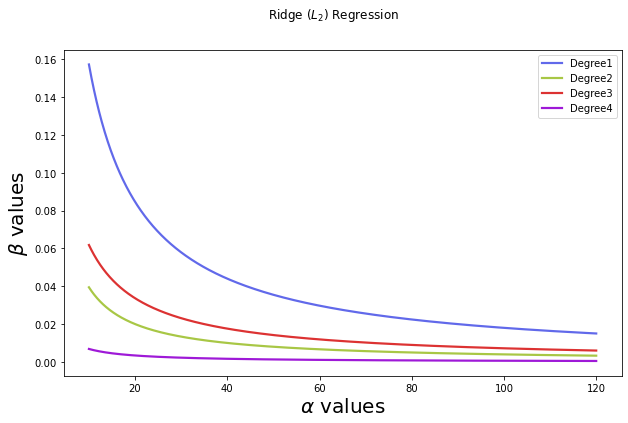

In [12]:
#PLOT THE GRAPH

colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize=(10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(trend[i+1]), color = colors[i], alpha = 0.9, label = f'Degree{i+1}', lw = 2.2)
    ax.legend(loc='best', fontsize = 10)
    ax.set_xlabel(r'$\alpha$ values', fontsize = 20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
fig.suptitle(r'Ridge ($L_2$) Regression');


Compare the results of Ridge regression with the Lasso variant

In [13]:
#select a list of alphas ranging from 1e-4 to 1e-1 with 1000 points in between
alpha_list = np.linspace(-4, -1, 1000)
len(alpha_list)

1000

In [21]:
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


#Now, you will implement the ridge regularisation for each alpha value, again normalize

for i in alpha_list:

    lasso_reg = Lasso(alpha=i,max_iter=250000,normalize=True)

    #Fit on the entire data because we just want to see the trend of the coefficients
    
    lasso_reg.fit(x_poly, y)
    
    # Again append the coeff_list with the coefficients of the model

    coeff_list.append(lasso_reg.coef_)

In [22]:
#get the transpose of the list to get the variation in the coefficient values as per degree
trend = np.array(coeff_list).T

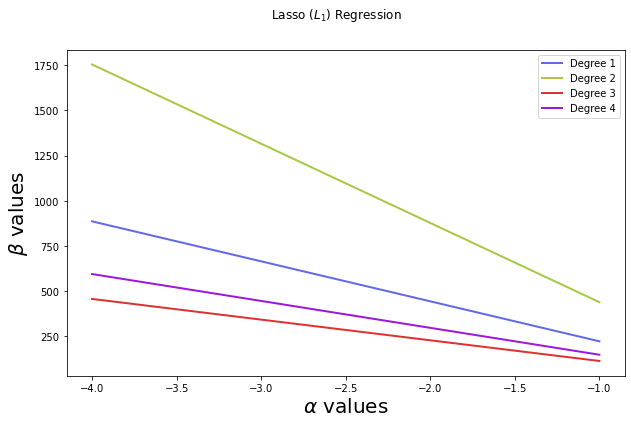

In [23]:
# Use helper code below to plot the variation of the coefficients as per the alpha value

colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list,np.abs(trend[i+1]),color=colors[i],alpha = 0.9,label = f'Degree {i+1}',lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression');

Theren was an inverse trend in ridge, while a direct downward trend in lasso.